In [683]:
import numpy as np
from scipy.linalg import eigh
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为 SimHei (黑体)，避免中文乱码
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# T2

对方程组
$$\begin{gathered}
2 x_{1}+3 x_{2}+5 x_{3}= \text{5} \\
3 x_{1}+4 x_{2}+8 x_{3}= \text{6} \\
  x_{1}+3  x_{2}+3  x_{3} = \text{5} 
\end{gathered}$$
可以直接解得
$$x_1=2 \qquad x_2=2 \qquad x_3=-1 $$

将方程组g改写为
$$\mathbf{A} \vec{x} = \vec{b}$$
其中
$$
\mathbf{A} = \left[
\begin{matrix}
2 & 3 & 5 \\
3 & 4 & 8 \\
1 & 3 & 3 \\

\end{matrix}
\right] \qquad 
\vec{b} = (5,6,6)^{T}$$

In [684]:
A = np.array([[2,3,5],[3,4,8],[1,3,3]], dtype=np.float64)
b = np.array([5,6,5], dtype=np.float64)


In [685]:
# 利用包内自带函数解出方程
x = linalg.solve(A, b)
x

array([ 2.,  2., -1.])

In [686]:
def GaussianElimination(A:np.ndarray,b:np.ndarray):
    n = np.shape(A)[0]
    for i in range(n-1):
        #print(A.T,A.T[i][i:])
        p = np.argmax(A.T[i][i:])+i#找到主元索引值
        
        A_c = np.copy(A)
        b_c = np.copy(b)

        A[i] = A_c[p]#将主元换至第i行
        A[p] = A_c[i]
        b[i] = b_c[p]
        b[p] = b_c[i]
        
        for j in range(i+1,n):
            
            f = A[j][i]/A[i][i]

            A[j] = A[j] - f*A[i]
            b[j] = b[j] - f*b[i]

    x = np.zeros(n)
    for k in range(n-1,-1,-1):
        x[k] = (b[k]-np.dot(A[k],x))/A[k][k]
    return A,b,x

In [687]:
A_sup,b_sup,x=GaussianElimination(A,b)
print("通过高斯消元将A化为上三角阵为\n{}\n，对应b向量为为{}，\n对应得到方程解为{}".format(A_sup,b_sup,x))

通过高斯消元将A化为上三角阵为
[[ 3.          4.          8.        ]
 [ 0.          1.66666667  0.33333333]
 [ 0.          0.         -0.4       ]]
，对应b向量为为[6.  3.  0.4]，
对应得到方程解为[ 2.  2. -1.]


与理论解一致

# T3

In [688]:
def GaussianBasisFunc(x,s,v):
    return np.sqrt(v/np.pi)*np.exp(-v*(x-s)**2)


def Calculate_S(vi, vj, si, sj):
    exponent = - (vi * vj * (si - sj)**2) / (vi + vj)
    return (np.sqrt(vi) * np.sqrt(vj) * np.exp(exponent)) / (np.sqrt(np.pi) * np.sqrt(vi + vj))

    

def Calculate_H1(vi, vj,si,sj):
    part1 = 1 / (2 * np.sqrt(np.pi) * (vi + vj) ** (5/2))
    exponent = -(((si - sj) ** 2 * vi * vj) / (vi + vj))
    part2 = np.exp(exponent)
    part3 = np.sqrt(vi) * np.sqrt(vj)
    part4 = (vi + vj +2 * sj ** 2 * vj ** 2 +4 * vi * vj * (si * sj + vj) +2 * vi ** 2 * (si ** 2 + 2 * vj - 4 * (si - sj) ** 2 * vj ** 2))   
    H1 = part1 * part2 * part3 * part4
    return H1

def Calculate_H2(vi, vj, si, sj):
    # Define constants
    term1 = 1 / (4 * np.sqrt(np.pi) * (vi + vj)**(9/2)) * np.sqrt(vi) * np.sqrt(vj)
    exp_part = np.exp(-(((si - sj)**2 * vi * vj) / (vi + vj)))

    term2_vi2 = vi**2 * (3 - 2 * vi + 4 * si**2 * vi * (3 + (-1 + si**2) * vi))
    term2_vi_vj = 2 * vi * (3 + vi * (-3 + si**2 * (6 - 4 * vi) - 4 * si * sj * (-3 + vi) + 8 * si**3 * sj * vi)) * vj
    term2_vj2 = (3 + 2 * vi * (-3 + 4 * si * sj * (3 - 2 * vi) - 2 * sj**2 * (-3 + vi) + 2 * si**2 * (-1 + 6 * sj**2) * vi)) * vj**2
    term2_vj3 = 2 * (-1 + 2 * sj * (-2 * si * vi + sj * (3 + (-2 + 4 * si * sj) * vi))) * vj**3
    term2_vj4 = 4 * sj**2 * (-1 + sj**2) * vj**4

    correction_term = -8 * vi * vj * (vi + vj)**2 * (-vj + vi * (-1 + 2 * (si - sj)**2 * vj))

    term2 = term2_vi2 + term2_vi_vj + term2_vj2 + term2_vj3 + term2_vj4 + correction_term
    H2 = term1 * exp_part * term2
    
    return H2

def V1(x):
    return x**2

def V2(x):
    return x**4-x**2

#精度达不到，遂弃用
def GetEigen(H:np.array,S:np.array):

    EigenVal,U = np.linalg.eig(S)
    D = np.diag(EigenVal)
    
    S_sqrt = U@np.sqrt(D)@np.linalg.inv(U)
    
    print(S_sqrt@S_sqrt == S)
    
    S_sqrt_inv = np.linalg.inv(S_sqrt)
    
    H_new = S_sqrt_inv@H@S_sqrt
    
    E,C = np.linalg.eig(H_new)
    

    C = S_sqrt_inv@C
    

    
    return E,C


In [689]:
# 定义参数 
n_basis = 600 #基函数数量
v = 1 #固定各基宽度
n_x =600 #画图所用点数

s_max = 200 #基函数中心最大值
x_max =5


s_min = -s_max
s_array = np.linspace(s_min,s_max,n_basis)


In [690]:
#计算H矩阵和S矩阵
H1 = np.zeros((n_basis,n_basis))
H2 = np.zeros((n_basis,n_basis))
S = np.zeros((n_basis,n_basis))

for i in range(n_basis):
    for j in range(n_basis):
        H1[i][j] = Calculate_H1(v,v,s_array[i],s_array[j])
        H2[i][j] = Calculate_H2(v,v,s_array[i],s_array[j])
        S[i][j] = Calculate_S(v,v,s_array[i],s_array[j])
        

In [691]:
# 计算E和C
E1,C1 = eigh(H1,S)
E2,C2 = eigh(H2,S)
print("V(x)=x^2时最低的三个能量本征态是",E1[:3])
print("V(x)=x^4-x^2时最低的三个能量本征态是",E2[:3])

V(x)=x^2时最低的三个能量本征态是 [1.00000001 3.00000015 5.00000512]
V(x)=x^4-x^2时最低的三个能量本征态是 [0.65777349 2.83490568 6.18086755]


In [692]:
#计算各基函数值

x = np.linspace(-x_max,x_max,n_x)
Phi = np.zeros((n_basis,n_x))
for i in range(n_basis):
    for j in range(n_x):
        Phi[i][j] = GaussianBasisFunc(x[j],s_array[i],v)

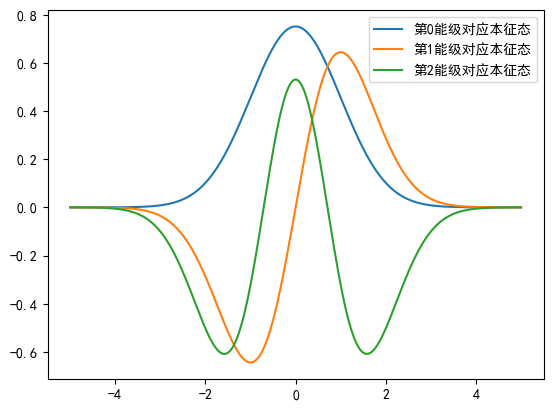

In [693]:
# 画出V=V1时的能量最低的三个本征态和对应本征值
plt.figure()

for i in range(3):
    Psi1 = C1.T[i]@Phi
    norm=np.trapz(Psi1**2,x)
    Psi1=Psi1/np.sqrt(norm)
    plt.plot(x,Psi1,label = '第{}能级对应本征态'.format(i))
plt.legend()
plt.show()

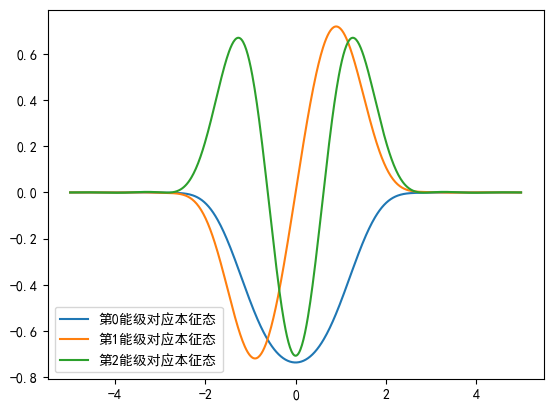

In [694]:
plt.figure()

for i in range(3):
    Psi2 = C2.T[i]@Phi
    norm=np.trapz(Psi2**2,x)
    Psi2=Psi2/np.sqrt(norm)
    plt.plot(x,Psi2,label = '第{}能级对应本征态'.format(i))

plt.legend()
plt.show()